In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv('dataset/bank_marketing.csv', sep= ';')

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# COMPREHENSION DES DONNEES

| Nom de la variable | Définition |
| ------------------ | -------------------------------------------------------------------------------------------------------------- |
| age | L'âge de l'individu (numérique). |
| job | Le type de travail de l'individu (catégorielle). |
| marital | L'état civil de l'individu (catégorielle). |
| education | Le niveau d'éducation de l'individu (catégorielle). |
| default | Indique si l'individu a un crédit en défaut (catégorielle : "oui", "non"). |
| housing | Indique si l'individu a un prêt immobilier (catégorielle : "oui", "non"). |
| loan | Indique si l'individu a un prêt personnel (catégorielle : "oui", "non"). |
| contact | Le type de communication utilisé (catégorielle : "cellulaire", "téléphone"). |
| month | Le mois du dernier contact (catégorielle). |
| day_of_week | Le jour de la semaine du dernier contact (catégorielle). |
| duration | La durée du dernier contact, en secondes (numérique). |
| campaign | Le nombre de contacts effectués pendant cette campagne pour ce client (numérique). |
| pdays | Nombre de jours écoulés depuis le dernier contact avec le client lors d'une campagne précédente (numérique). |
| previous | Le nombre de contacts effectués avant cette campagne pour ce client (numérique). |
| poutcome | Le résultat de la campagne marketing précédente (catégorielle : "échec", "succès", "inexistant"). |
| emp.var.rate | Indicateur du taux de variation de l'emploi (numérique). |
| cons.price.idx | Indice des prix à la consommation (numérique). |
| cons.conf.idx | Indice de confiance des consommateurs (numérique). |
| euribor3m | Taux Euribor à 3 mois (numérique). |
| nr.employed | Nombre d'employés (numérique). |
| y | Indique si le client a souscrit à un dépôt à terme (catégorielle : "oui", "non"). |



Ce dataset est issu d'une campagne de marketing téléphonique menée par une banque pour inciter ses clients à souscrire à des dépôts à terme. Il contient plus de 41 000 enregistrements et 21 variables, couvrant divers aspects des clients et des interactions de la campagne. Parmi les informations, on retrouve des données sociodémographiques comme l'âge des clients, leur profession, leur état civil et leur niveau d'éducation. On y trouve aussi des informations financières, comme la possession ou non d'un prêt immobilier (housing) ou d'un prêt personnel (loan), ainsi que des indicateurs économiques tels que le taux Euribor à trois mois et l'indice de confiance des consommateurs (cons.conf.idx).

En plus de ces informations, le dataset inclut des détails sur la campagne elle-même, notamment le nombre de contacts déjà effectués avec le client (campaign), la durée des appels, et le résultat des campagnes précédentes (poutcome). L'objectif final de ce dataset est de prédire si un client a souscrit ou non à un dépôt à terme, cette information étant représentée par la variable cible y.

# EXPLORARTION DES DONNEES

In [8]:
# description data numerique
df.describe(exclude = 'object')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


On remarque quelque chose d'intéressant dans la variable pdays : 75 % des clients ont un pdays de 999, ce qui signifie probablement qu'ils n'ont jamais été contactés dans une campagne précédente. Nous vérifierons cela plus tard.

In [9]:
# description data categorielle
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [10]:
# separation des variables numerique et categorielle 
var_num = df.select_dtypes(exclude = 'object').columns
var_cat = df.select_dtypes(include = 'object').columns.drop('y')

# TRAITEMENT DOUBLON

In [11]:
df.duplicated().value_counts()

False    41176
True        12
Name: count, dtype: int64

In [12]:
df[df.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [13]:
df = df.drop_duplicates()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

# TRAITEMENT VALEUR 'UNKNOWN'

In [15]:
# verificattion valeur nul
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [16]:
cols_nan = []

for col in df.columns:
    if 'unknown' in df[col].values:
        cols_nan.append(col)

In [17]:
for col in cols_nan:
    df[col] = df[col].replace('unknown', np.nan)

In [18]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [19]:
for col in cols_nan:
    df[col] = df[col].fillna(df[col].mode()[0])

In [20]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# ANALYSE UNIVARIEE

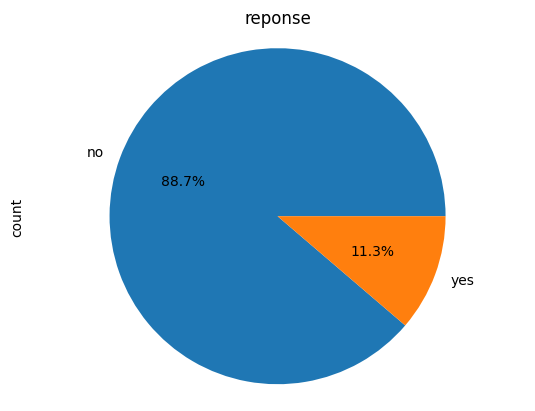

In [21]:
# distribution de la variable cible
df['y'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('reponse')
plt.axis('equal')
plt.show()

On remarque ici un déséquilibre de classes, qui concerne notre variable cible.

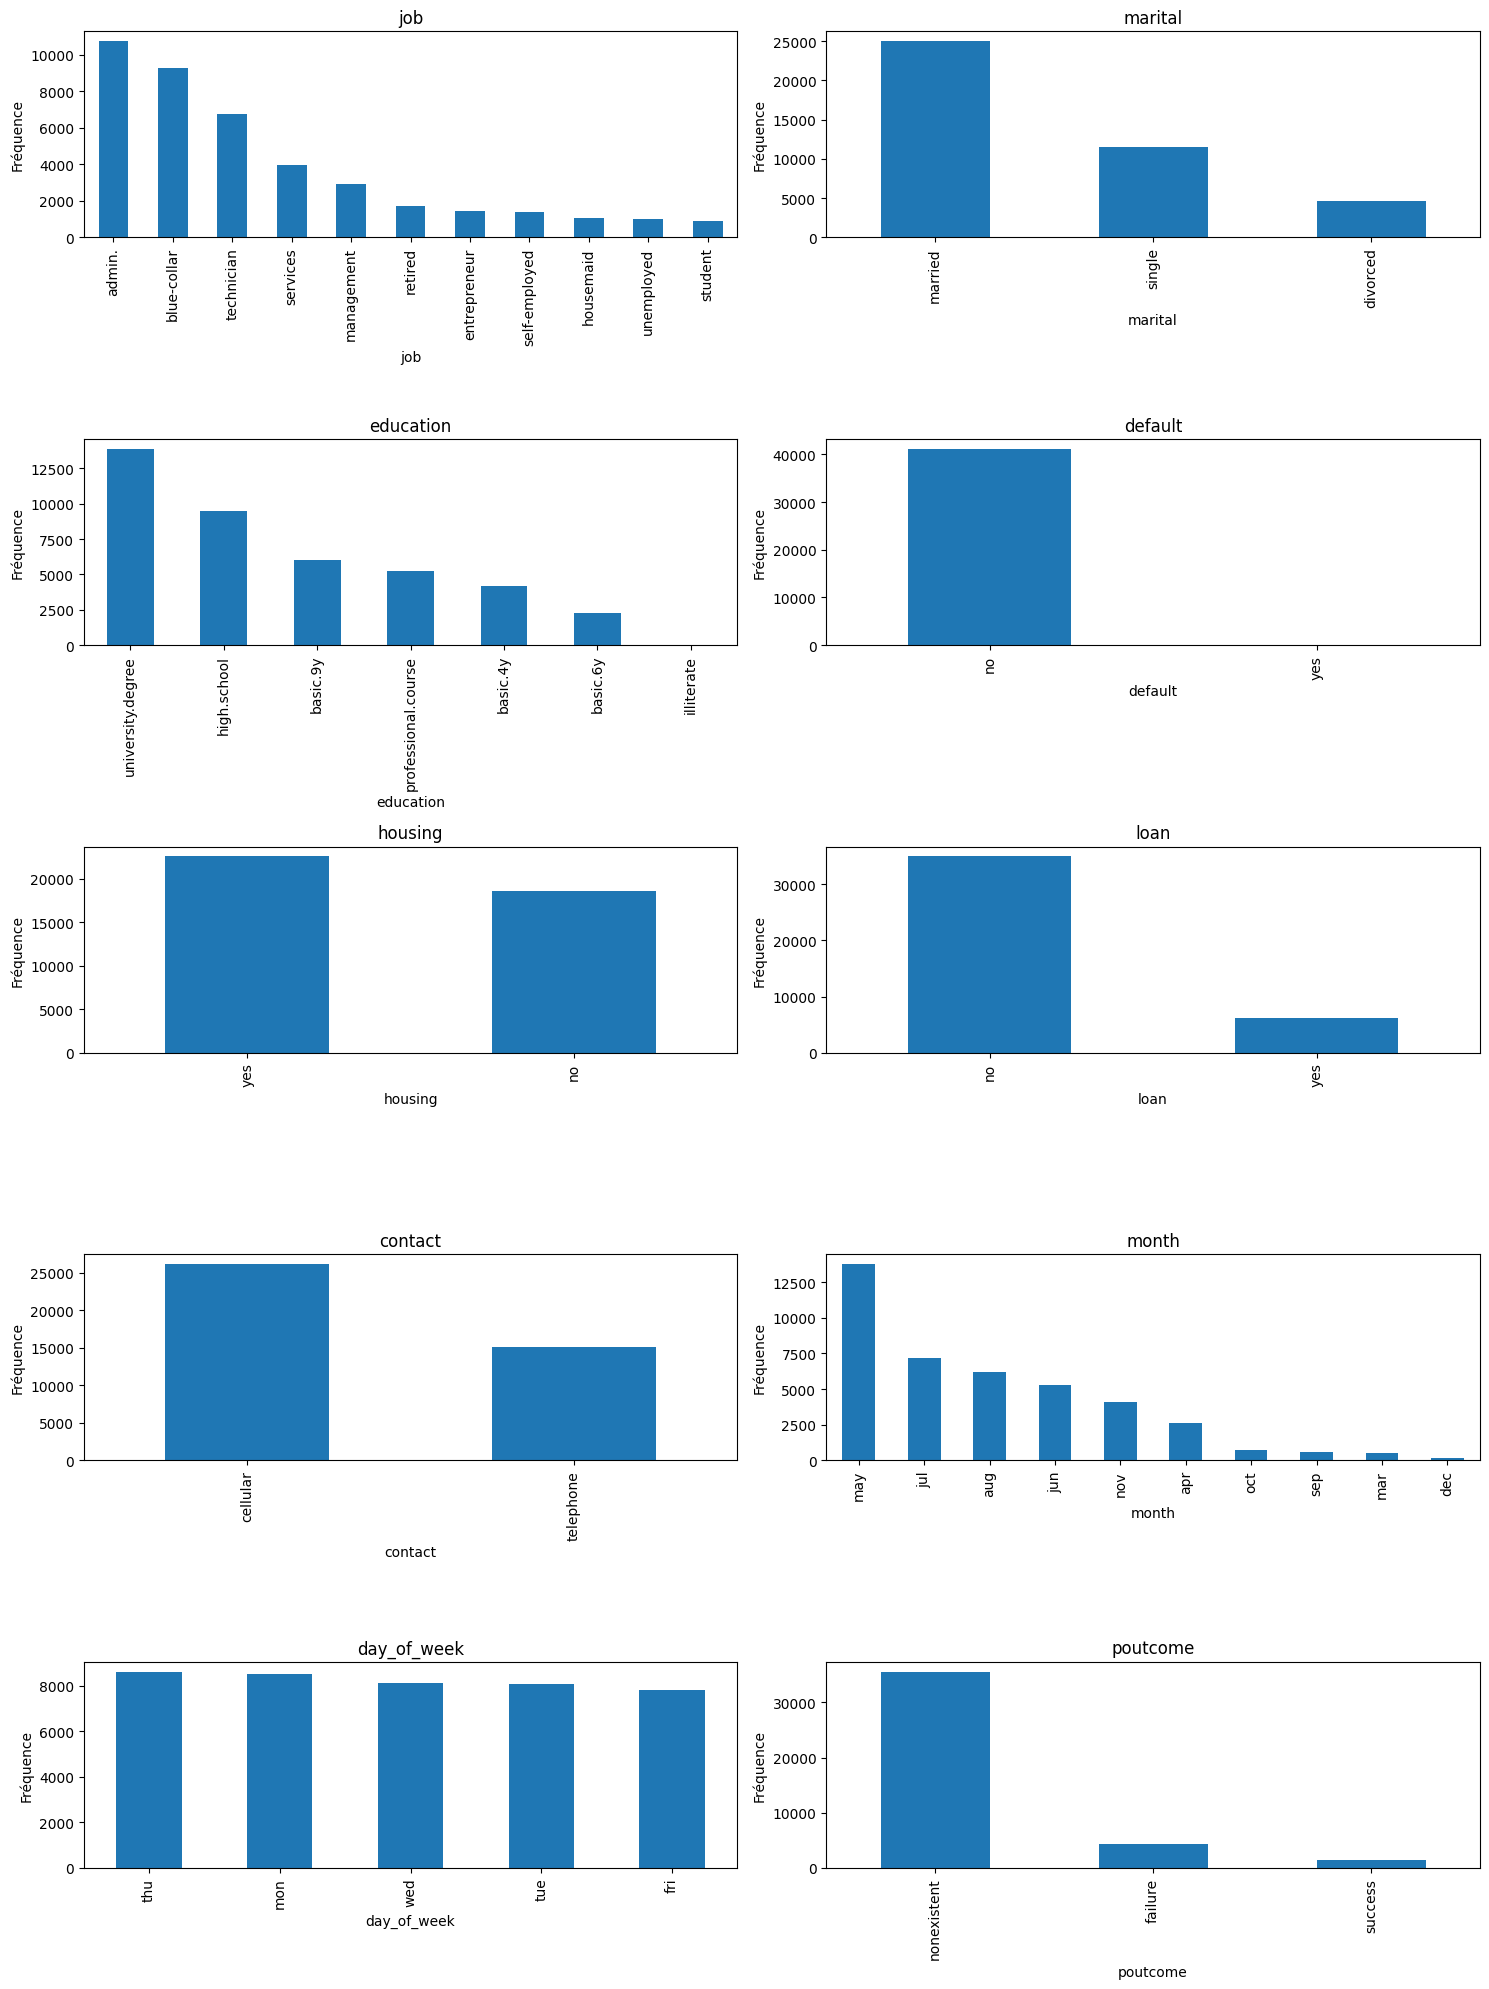

In [22]:
# Créer une figure avec des subplots de 2 colonnes et 5 lignes
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Aplatir les axes pour faciliter l'itération
axes = axes.flatten()

# Boucle pour afficher chaque variable catégorielle dans un subplot
for i, var in enumerate(var_cat):
    df[var].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(var)
    axes[i].set_ylabel('Fréquence')

# Ajuster la disposition pour éviter les chevauchements
plt.tight_layout()
plt.show()

In [42]:
df.groupby('y')['default'].value_counts()

y    default
no   no         36534
     yes            3
yes  no          4639
Name: count, dtype: int64

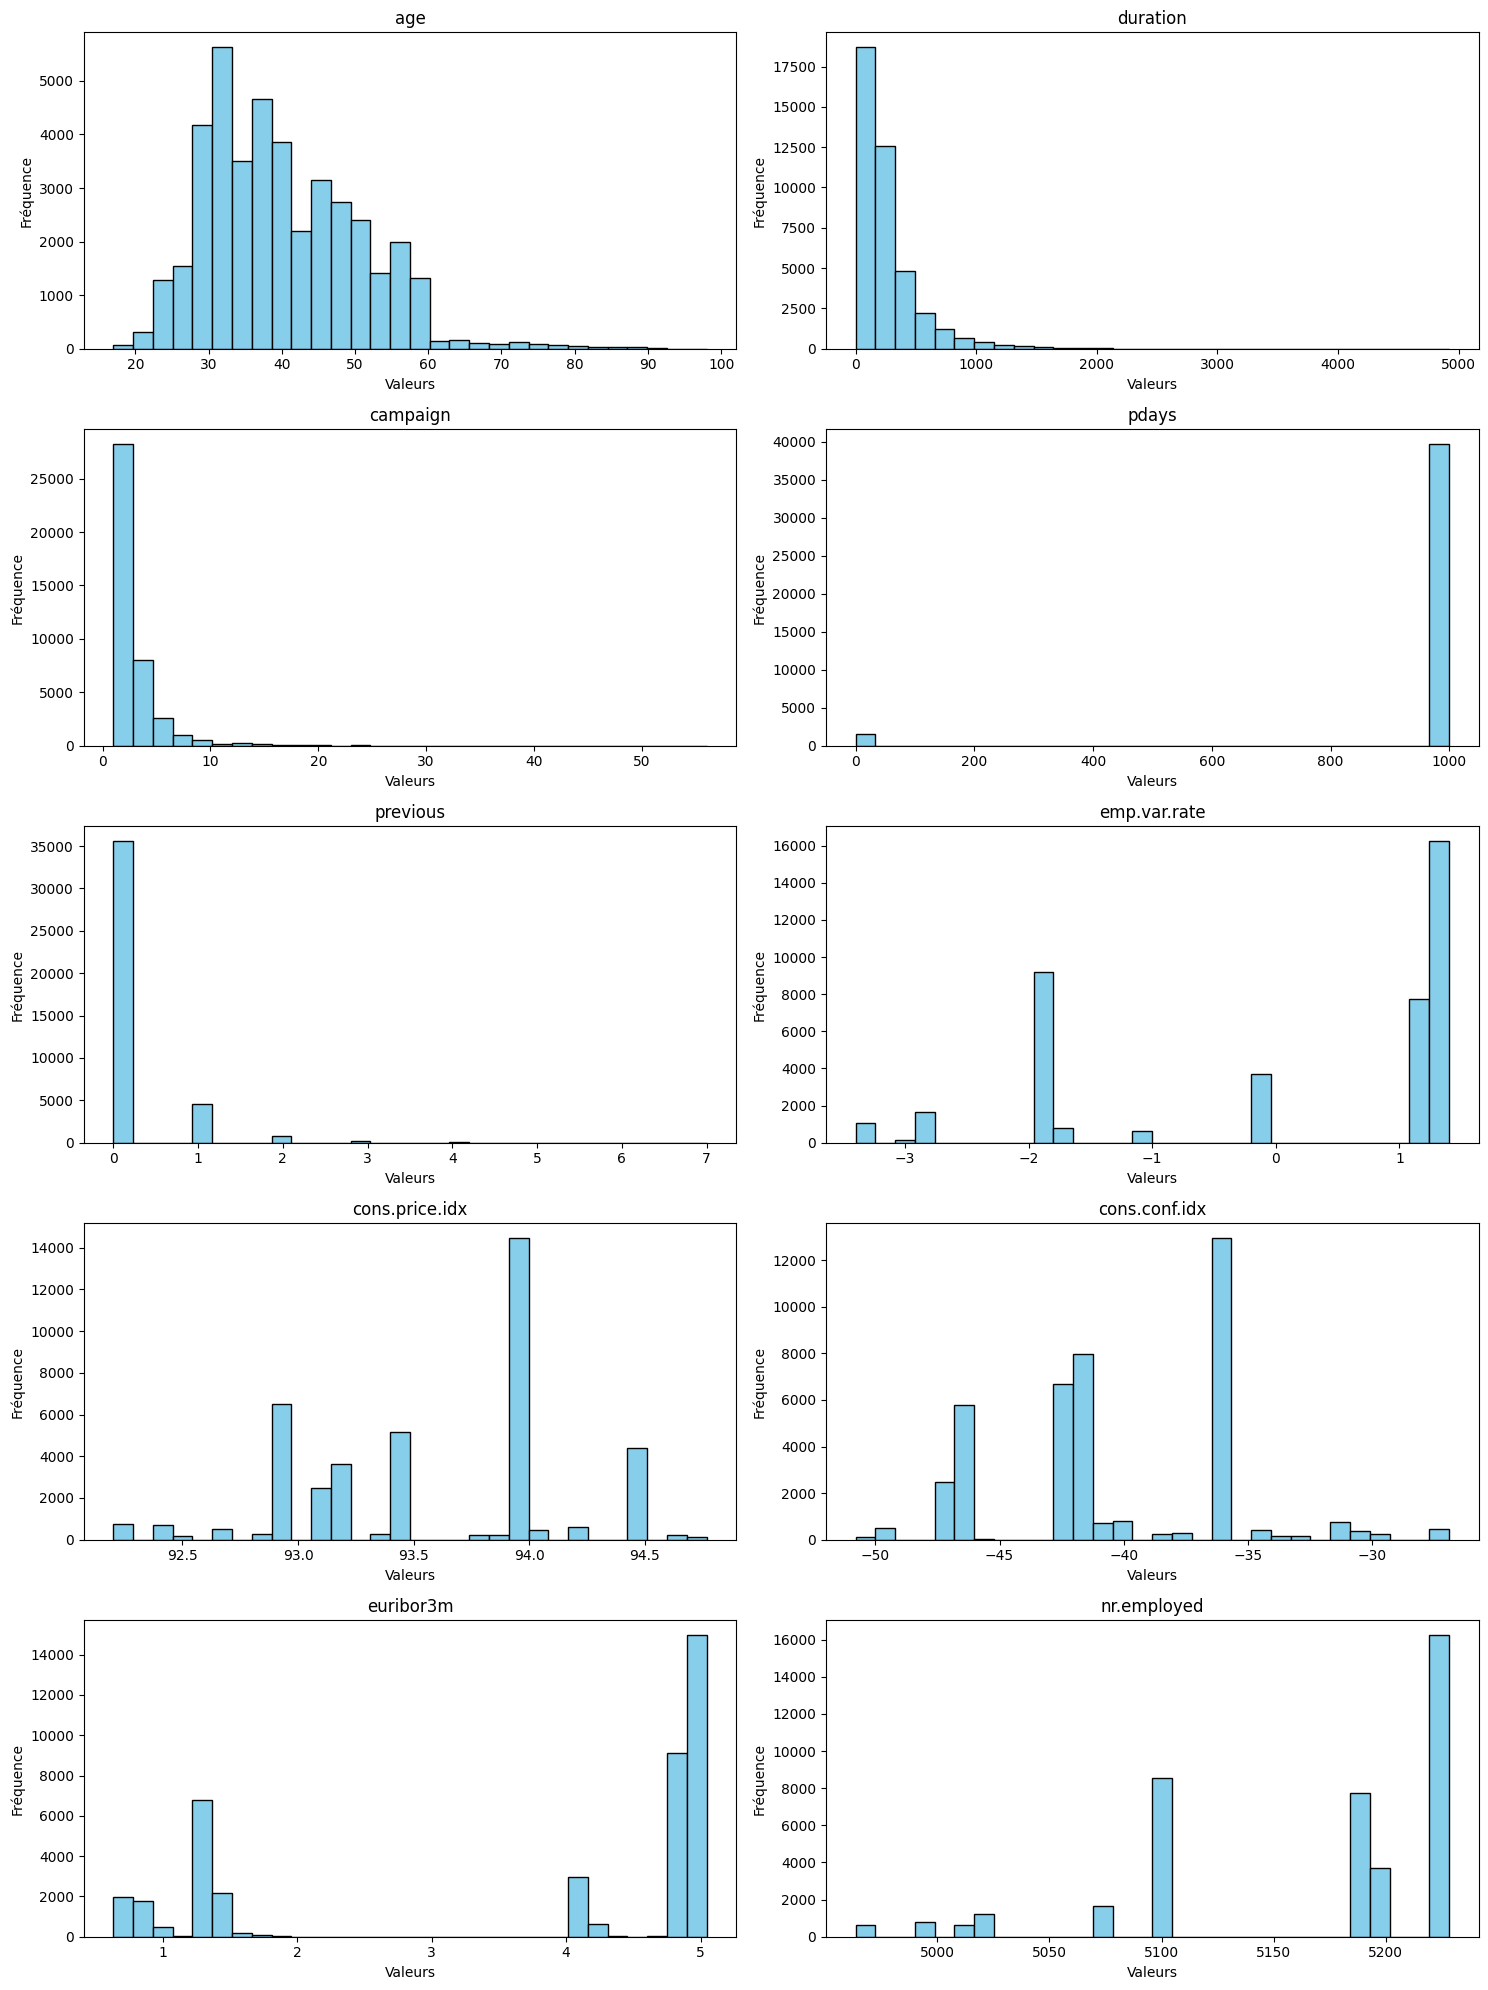

In [23]:
# Visualiser les variables numériques avec des histogrammes
fig, axes = plt.subplots(5, 2, figsize=(15, 20))  # Ajuster le nombre de lignes et colonnes
axes = axes.flatten()

for i, var in enumerate(var_num):
    df[var].plot(kind='hist', bins=30, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(var)
    axes[i].set_xlabel('Valeurs')
    axes[i].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


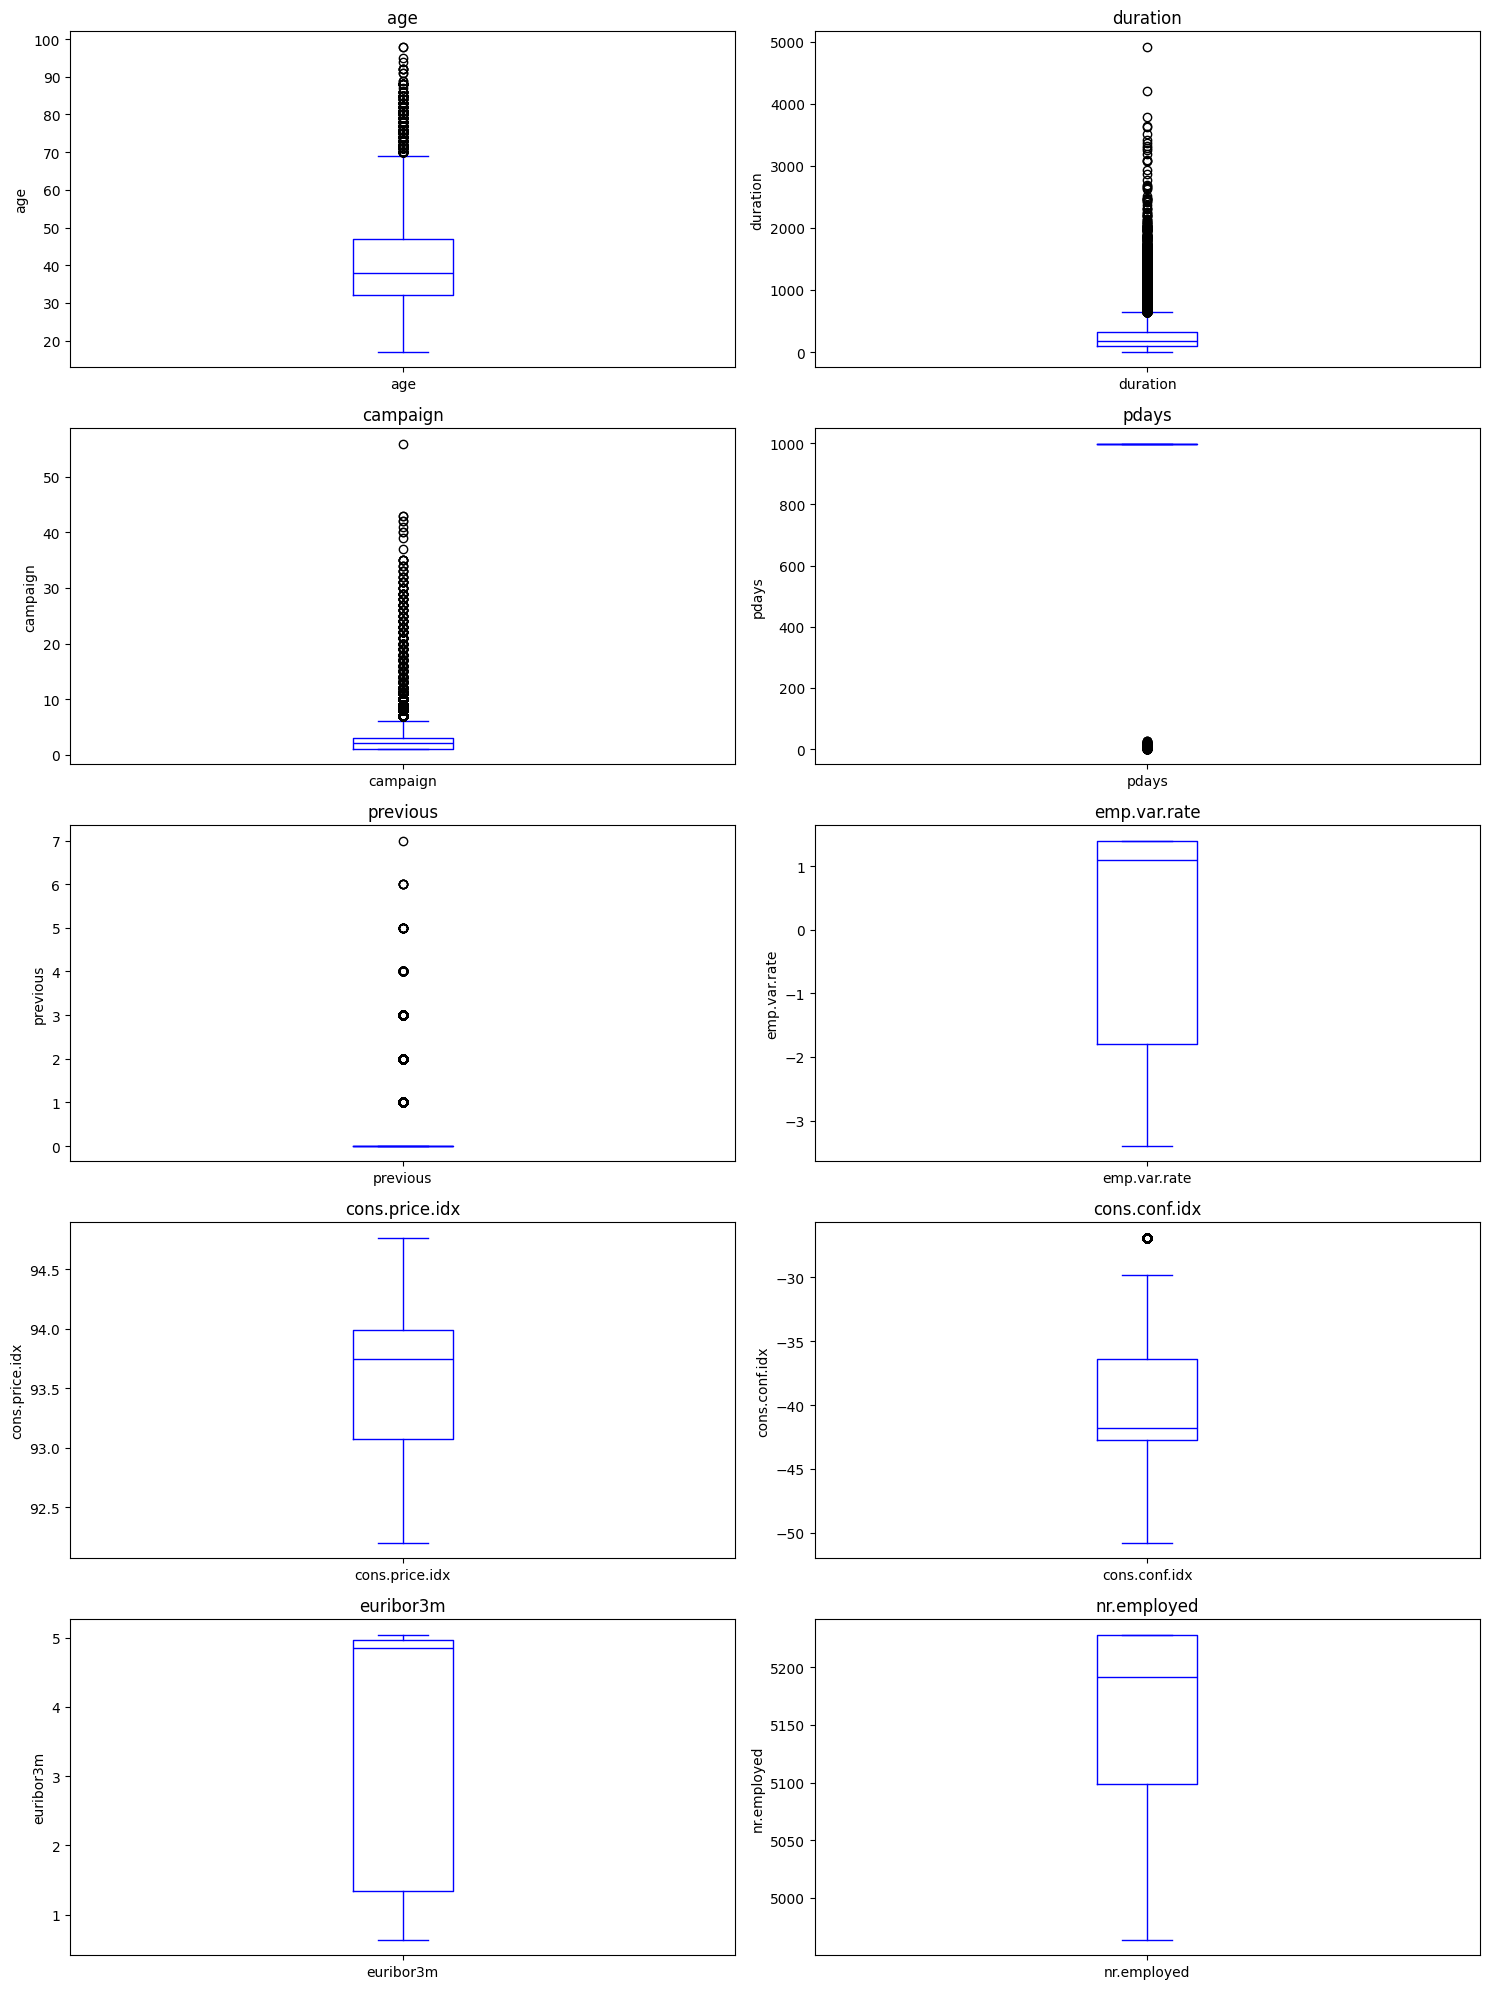

In [24]:
# Visualiser les variables numériques avec des boxplots
fig, axes = plt.subplots(5, 2, figsize=(15, 20))  # Ajuster le nombre de lignes et colonnes
axes = axes.flatten()

for i, var in enumerate(var_num):
    df[var].plot(kind='box', ax=axes[i], color='blue')
    axes[i].set_title(var)
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()


In [25]:
# TRAITEMENT DES VALEURS 999 DANS 'PDAYS'

df['pdays'] = df['pdays'].replace(999, -1)

# ANALYSE BIVARIEE

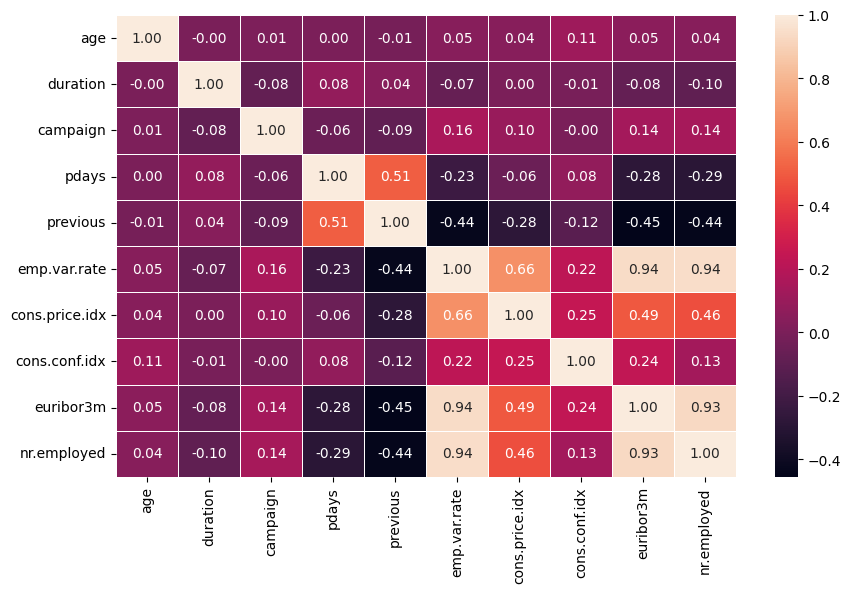

In [26]:
# analyse de correlation entre les variables numeriques
plt.figure(figsize=(10,6))
sns.heatmap(df[var_num].corr(method='spearman'), annot=True, fmt=".2f", linewidths=.5)
plt.show()

forte correlation entre :
- emp.var.rate et cons.price.idx
- emp.var.rate et euribor3m
- emp.var.rate et nr.employed
- euribor3m et nr.employed

In [27]:
# analyse de liaison entre les variables categorielles
from scipy.stats import chi2_contingency

# Fonction pour effectuer le test du chi-carré sur deux variables catégorielles
def chi_square_test(df, col1, col2):
    confusion_matrix = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, ex = chi2_contingency(confusion_matrix)
    return chi2, p

# Fonction pour calculer Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))


In [28]:
# Dictionnaire pour stocker les résultats
significant_chi2_tests = {}

# Effectuer le test du chi-carré pour toutes les paires de variables catégorielles
for i, col1 in enumerate(var_cat):
    for col2 in var_cat[i+1:]:
        chi2, p = chi_square_test(df, col1, col2)
        if p < 0.05:
            significant_chi2_tests[f'{col1} vs {col2}'] = {'chi2': chi2, 'p-value': p}

In [29]:
# Afficher les résultats du test du chi-carré concluant
print("Résultats du test du chi-carré concluant (p < 0.05) :")
for test, result in significant_chi2_tests.items():
    print(f"{test}: chi2 = {result['chi2']:.2f}, p-value = {result['p-value']:.4f}")

Résultats du test du chi-carré concluant (p < 0.05) :
job vs marital: chi2 = 4007.83, p-value = 0.0000
job vs education: chi2 = 34157.12, p-value = 0.0000
job vs default: chi2 = 18.68, p-value = 0.0445
job vs housing: chi2 = 19.50, p-value = 0.0344
job vs loan: chi2 = 22.67, p-value = 0.0121
job vs contact: chi2 = 642.04, p-value = 0.0000
job vs month: chi2 = 4514.41, p-value = 0.0000
job vs day_of_week: chi2 = 73.00, p-value = 0.0011
job vs poutcome: chi2 = 827.98, p-value = 0.0000
marital vs education: chi2 = 1612.73, p-value = 0.0000
marital vs housing: chi2 = 8.76, p-value = 0.0126
marital vs contact: chi2 = 215.50, p-value = 0.0000
marital vs month: chi2 = 324.55, p-value = 0.0000
marital vs day_of_week: chi2 = 20.85, p-value = 0.0075
marital vs poutcome: chi2 = 109.51, p-value = 0.0000
education vs housing: chi2 = 16.19, p-value = 0.0128
education vs contact: chi2 = 532.33, p-value = 0.0000
education vs month: chi2 = 2354.87, p-value = 0.0000
education vs day_of_week: chi2 = 74.3

In [30]:
# Calculer Cramér's V pour les paires où le test du chi-carré est concluant
cramers_v_results = {}

for test in significant_chi2_tests.keys():
    col1, col2 = test.split(" vs ")
    confusion_matrix = pd.crosstab(df[col1], df[col2])
    cramers_v_value = cramers_v(confusion_matrix)
    cramers_v_results[test] = cramers_v_value

In [31]:
# Afficher les résultats de Cramér's V pour les paires significatives
for test, v_value in cramers_v_results.items():
    if isinstance(v_value, pd.Series):
        v_value = v_value.iloc[0]  # Si c'est une série, prendre le premier élément
    print(f"{test}: Cramér's V = {v_value:.2f}")


job vs marital: Cramér's V = 0.66
job vs education: Cramér's V = 1.17
job vs default: Cramér's V = 0.02
job vs housing: Cramér's V = 0.03
job vs loan: Cramér's V = 0.03
job vs contact: Cramér's V = 0.16
job vs month: Cramér's V = 0.44
job vs day_of_week: Cramér's V = 0.05
job vs poutcome: Cramér's V = 0.31
marital vs education: Cramér's V = 0.44
marital vs housing: Cramér's V = 0.02
marital vs contact: Cramér's V = 0.09
marital vs month: Cramér's V = 0.25
marital vs day_of_week: Cramér's V = 0.04
marital vs poutcome: Cramér's V = 0.11
education vs housing: Cramér's V = 0.03
education vs contact: Cramér's V = 0.14
education vs month: Cramér's V = 0.39
education vs day_of_week: Cramér's V = 0.05
education vs poutcome: Cramér's V = 0.14
default vs day_of_week: Cramér's V = 0.04
housing vs loan: Cramér's V = 0.04
housing vs contact: Cramér's V = 0.10
housing vs month: Cramér's V = 0.28
housing vs day_of_week: Cramér's V = 0.05
housing vs poutcome: Cramér's V = 0.08
loan vs contact: Cramér'

forte liaison entre :
- job et education
- contact et month
- contact et poutcome
- month et poutcome

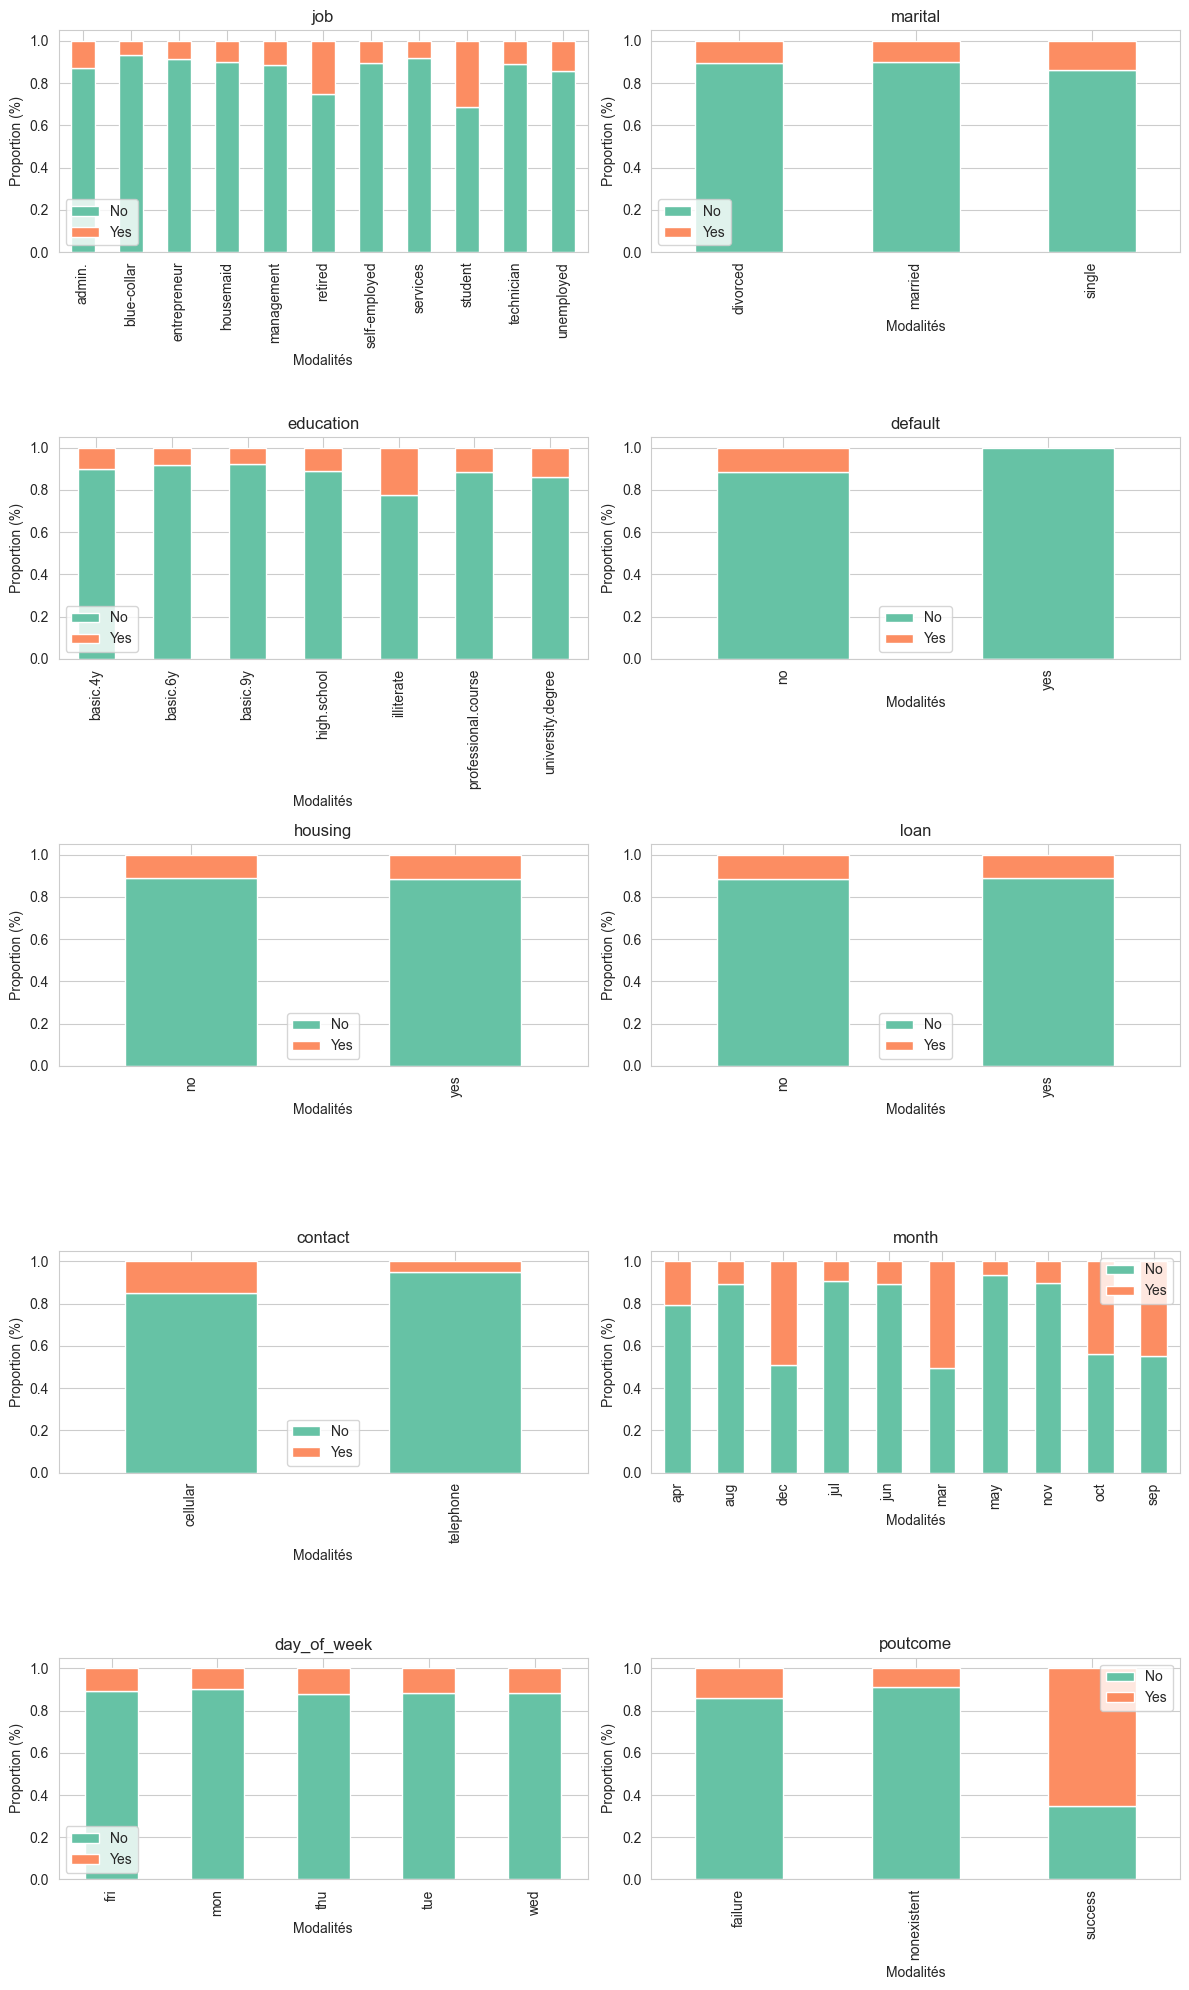

In [32]:
# variables categorielles pa rapport a y (variable cible)

# Définir un style global et une palette de couleurs avec seaborn
sns.set_style("whitegrid")  # Style général
palette = sns.color_palette("Set2")  # Palette de couleurs

# Créer une figure avec des sous-graphiques (2 lignes et 5 colonnes)
fig, axes = plt.subplots(5, 2, figsize=(12, 20))

# Boucle pour générer les bar plots sur les sous-graphiques
for i, var in enumerate(var_cat):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Générer un bar plot pour chaque variable catégorielle
    (df.groupby([var, 'y'])['y'].count()/df.groupby([var])[var].count()).unstack(level=1).plot(kind='bar', stacked=True, ax=ax, color=[palette[0], palette[1]])

    ax.set_title(var)
    ax.set_xlabel('Modalités')
    ax.set_ylabel('Proportion (%)')
    ax.legend(['No', 'Yes'])

# Supprimer les sous-graphiques vides s'il y en a
for j in range(len(var_cat), 10):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


In [33]:
# test de liaison des variables categorielle et la variable cible:

# Initialiser les listes pour stocker les résultats
var_names = []
chi2_stats = []
p_values = []
cramer_vs = []

# Parcourir toutes les variables catégorielles
for var in var_cat:
    # Calculer le tableau de contingence
    contingency_table = pd.crosstab(df['y'], df[var])
    # Calculer la statistique de test du Chi-deux et la p-valeur
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Calculer le coefficient V de Cramer
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r,k = contingency_table.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rc = r-((r-1)**2)/(n-1)
    kc = k-((k-1)**2)/(n-1)
    cramer_v = np.sqrt(phi2corr/min(rc-1,kc-1))
    # Ajouter les résultats aux listes correspondantes
    var_names.append(var)
    chi2_stats.append(chi2)
    p_values.append(p)
    cramer_vs.append(cramer_v)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Chi2': chi2_stats,
    'P-valeur': p_values,
    'V de Cramer': cramer_vs
})

# Trier le DataFrame par ordre croissant de V de Cramer
results_df.sort_values(by='V de Cramer', inplace=True,ascending=False)

# Afficher le tableau des résultats
print(results_df)

      Variable         Chi2       P-valeur  V de Cramer
9     poutcome  4230.143428   0.000000e+00     0.320448
7        month  3103.032672   0.000000e+00     0.274123
0          job   960.758781  5.292143e-200     0.151956
6      contact   862.080737  1.718741e-189     0.144612
2    education   191.908091   9.996214e-39     0.067194
1      marital   121.087681   5.083282e-27     0.053779
8  day_of_week    26.054244   3.085755e-05     0.023143
4      housing     5.044191   2.470864e-02     0.009911
3      default     0.000000   1.000000e+00     0.000000
5         loan     0.786737   3.750887e-01     0.000000


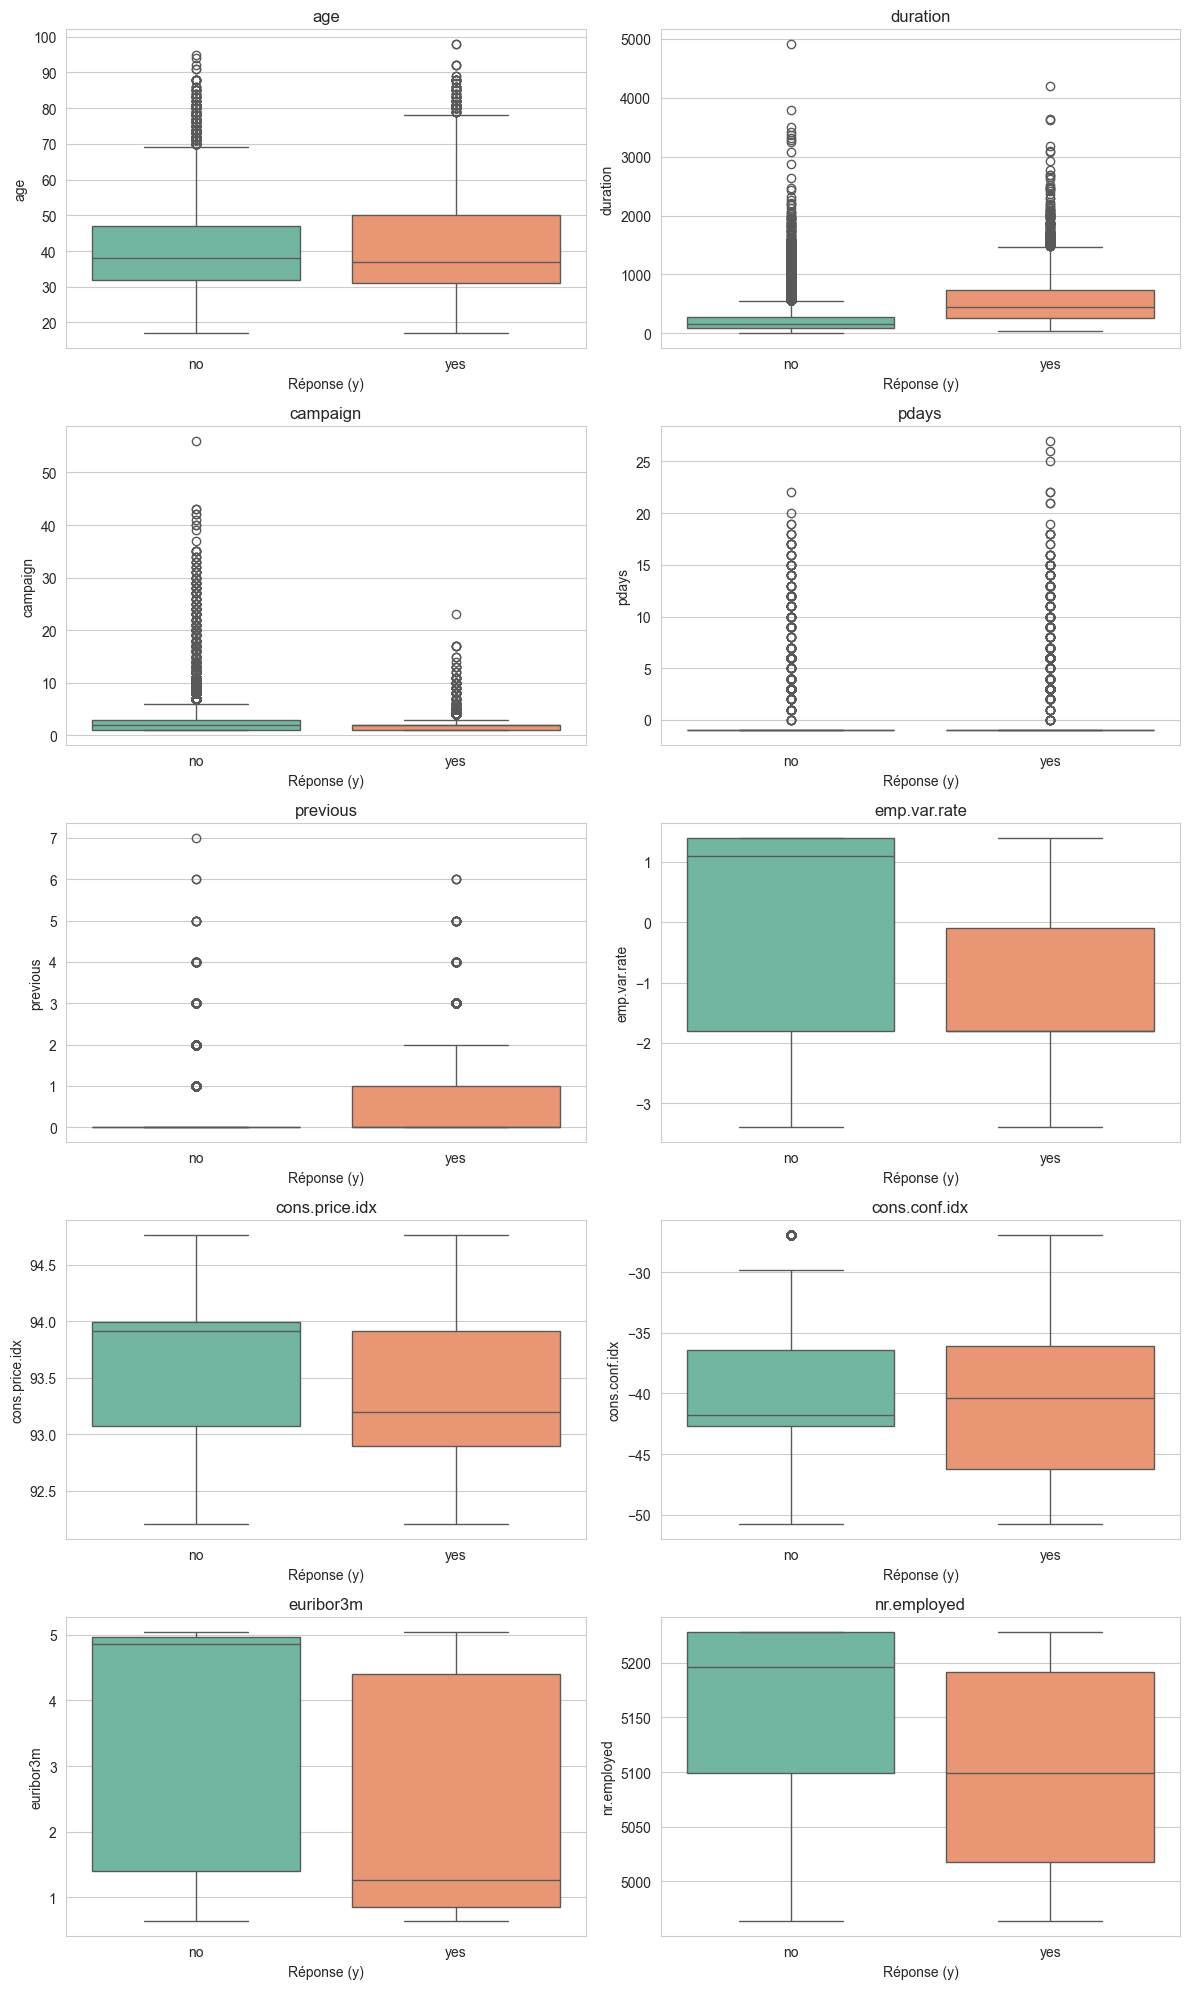

In [34]:
# Créer une figure avec des sous-graphiques (5 lignes et 2 colonnes)
fig, axes = plt.subplots(5, 2, figsize=(12, 20))

# Boucle pour générer les box plots sur les sous-graphiques pour chaque variable numérique
for i, var in enumerate(var_num):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Générer un box plot pour chaque variable numérique par rapport à la variable cible 'y'
    sns.boxplot(x='y', y=var, data=df, ax=ax, hue='y', palette='Set2', dodge=False)

    ax.set_title(var)
    ax.set_xlabel('Réponse (y)')
    ax.set_ylabel(var)

# Supprimer les sous-graphiques vides s'il y en a
for j in range(len(var_num), 10):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()



In [35]:
# test de Kruskal-Wallis

import scipy.stats as stats
# Initialiser les listes pour stocker les résultats
var_names = []
kw_stats = []
p_values = []

# Parcourir toutes les variables numériques
for var in var_num:
    # Calculer les groupes de valeurs
    groups = [df[df['y'] == 'no'][var], df[df['y'] == 'yes'][var]]
    # Appliquer le test de Kruskal-Wallis
    kw_stat, p = stats.kruskal(*groups)
    # Ajouter les résultats aux listes correspondantes
    var_names.append(var)
    kw_stats.append(kw_stat)
    p_values.append(p)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Kruskal-Wallis': kw_stats,
    'P-valeur': p_values
})

# Trier le DataFrame par ordre croissant de p-valeur
results_df.sort_values(by='P-valeur', inplace=True)

# Afficher le tableau des résultats
print(results_df)

         Variable  Kruskal-Wallis       P-valeur
1        duration     5008.952642   0.000000e+00
3           pdays     4341.068436   0.000000e+00
4        previous     1662.395640   0.000000e+00
5    emp.var.rate     2520.746110   0.000000e+00
8       euribor3m     2930.314757   0.000000e+00
9     nr.employed     3318.955621   0.000000e+00
6  cons.price.idx      614.089923  1.442737e-135
2        campaign      166.837941   3.629350e-38
7   cons.conf.idx       69.644594   7.101309e-17
0             age        5.843156   1.563775e-02


# RESUME DE L'EDA

## OBSERVATION

### Analyse des variables catégorielles :

- La variable cible, y, est déséquilibrée avec 88.7 % de non et seulement 11.3 % de oui. Cela pourrait indiquer un besoin de rééchantillonnage ou de techniques comme le SMOTE pour équilibrer les classes.
- Les variables telles que job, marital, education, default, housing, loan, contact, et month montrent une répartition variée entre les catégories.
- Des catégories comme default présentent une proportion écrasante de "non" (99.96 %), suggérant que cette variable pourrait ne pas avoir de forte influence sur le modèle prédictif.

### Analyse des variables numériques :

- La variable age a une moyenne de 40 ans avec une distribution relativement symétrique, mais elle varie entre 17 et 98 ans.
- duration montre une large dispersion (écart-type élevé). La durée de la dernière campagne est fortement corrélée à la réponse cible et pourrait être une variable prédictive clé.
- Des variables comme euribor3m et nr.employed présentent des corrélations importantes entre elles et avec d’autres variables économiques, ce qui peut indiquer une dépendance à la conjoncture économique.

### Analyse bivariée et corrélations :

- Le tableau de corrélation montre peu de corrélations fortes entre les variables explicatives, sauf quelques-unes comme entre euribor3m et emp.var.rate, ce qui pourrait indiquer une influence commune des variables macroéconomiques.
- La variable duration est fortement liée à la cible y.
- Les tests de Chi2 montrent des relations significatives entre job et education, job et marital, contact et month, et bien d'autres paires de variables. Cela pourrait suggérer des interactions entre ces variables qui devraient être incluses dans un modèle.

### Test d'indépendance (Chi2 et Kruskal-Wallis) :

- Les résultats des tests Chi2 révèlent des relations statistiquement significatives entre plusieurs variables catégorielles et la variable cible y, notamment poutcome, month, job, et contact. Cela montre que ces variables sont importantes pour la prédiction de la campagne de dépôt.
- Pour les variables numériques, le test de Kruskal-Wallis montre que des variables comme duration, pdays, emp.var.rate, et euribor3m ont des différences statistiquement significatives entre les deux groupes de la variable cible y, ce qui indique leur pertinence dans la modélisation.

## Conclusion
L'analyse exploratoire des données a montré des patterns intéressants, notamment la forte corrélation entre certaines variables et la cible. Les variables temporelles et économiques semblent avoir une importance significative. Cette EDA permet de mieux comprendre la structure du jeu de données et d’identifier les variables à considérer dans une modélisation prédictive. Des étapes futures incluent la gestion du déséquilibre de la classe, la sélection de variables, et potentiellement la création de nouvelles features pour capturer les interactions entre les variables.

In [36]:
df.to_csv('dataset/bank_marketing_clean.csv', index = False)